In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

In [2]:
#db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
#db_file = '/home/andrei2/Desktop/git/saltproc/test_data/tap/hardcoded/1/db_2187d.h5'
db_file = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/feed_leu_19.79/db_saltproc.h5'

step = 3.0/365.0 # days

db = tb.open_file(db_file, mode='r')
# print(db)

sim_param = db.root.simulation_parameters
# Keff at t=0 depletion step
k_bds = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
k_bds_err = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
# Keff at t=end depletion step
k_eds = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
k_eds_err = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])

db.close()

days = step*np.arange(len(k_bds))
days2 = np.linspace(step, (len(k_eds))*(step), num=len(k_eds), endpoint=True)

In [3]:
db_file_5leu = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/feed_leu_5/db_saltproc.h5'

db_5leu = tb.open_file(db_file_5leu, mode='r')

sim_param_5leu = db_5leu.root.simulation_parameters
# Keff at t=0 depletion step
k_bds_5 = np.array([x['keff_bds'][0] for x in sim_param_5leu.iterrows()])
k_bds_err_5 = np.array([x['keff_bds'][1] for x in sim_param_5leu.iterrows()])
# Keff at t=end depletion step
k_eds_5 = np.array([x['keff_eds'][0] for x in sim_param_5leu.iterrows()])
k_eds_err_5 = np.array([x['keff_eds'][1] for x in sim_param_5leu.iterrows()])

db_5leu.close()

days_5 = step*np.arange(len(k_bds_5))
days2_5 = np.linspace(step, (len(k_eds_5))*(step), num=len(k_eds_5), endpoint=True)

In [4]:
from pyne import serpent

res = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/no_feed_pure_sss/tap_res.m')

keff_no = res['IMP_KEFF'][:,0]         # K-eff parsing from dictionary
keff_no_err = res['IMP_KEFF'][:,1]         # K-eff standart deviation
days_no = res['BURN_DAYS'][:,0]

/home/andrei2/anaconda3/lib/python3.5/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [43]:
db_file_leu20_10d = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/db_saltproc.h5'
step2 = 10.0/365.0 # days

db_leu20_10d = tb.open_file(db_file_leu20_10d, mode='r')

sim_param_leu_10 = db_leu20_10d.root.simulation_parameters
# Keff at t=0 depletion step
k_bds_10d = np.array([x['keff_bds'][0] for x in sim_param_leu_10.iterrows()])
k_bds_err_10d = np.array([x['keff_bds'][1] for x in sim_param_leu_10.iterrows()])
# Keff at t=end depletion step
k_eds_10d = np.array([x['keff_eds'][0] for x in sim_param_leu_10.iterrows()])
k_eds_err_10d = np.array([x['keff_eds'][1] for x in sim_param_leu_10.iterrows()])

db_leu20_10d.close()

print(k_bds_10d)
print(k_eds_10d)
days_10d = step2*np.arange(len(k_bds_10d))
days2_10d = np.linspace(step2, (len(k_eds_5))*(10), num=len(k_eds_5), endpoint=True)
print(days_10d)

[ 1.01763999  1.01542997  1.01200998  1.00966001  1.00725996  1.00638998
  1.00381994  1.00204003  1.00003004  0.99808401  0.99618399  0.994551
  0.99277902  0.990502    0.98898298  0.98597902  0.98483998  0.98349297
  0.98149103  0.98077399  0.97769898  0.977175    0.97488201  0.97351098
  0.97294402  0.97080398  0.969055    0.96760499  0.96553397  0.965289
  0.963278    0.96236098  0.96057701  0.96066999  0.95946598  0.95753503
  0.95643699  0.95554203  0.954319    0.95344299  0.95240098  0.95145601
  0.950275    0.94941401  0.94890499  0.94697702  0.946823    0.94574201
  0.94476199  0.94353598  0.943443    0.94234002  0.94107598  0.94092202
  0.94031101  0.93911397  0.93817002  0.93792897  0.93696201  0.93644899
  0.93554199  0.934627    0.934017    0.933034    0.93321902  0.931813
  0.93133402  0.93014598  0.93008101  0.92970902  0.92893499  0.92808002
  0.927715    0.92723     0.92676598  0.92570502  0.92579502  0.92447299
  0.924586    0.92327303  0.923329    0.922979    0.92243

<IPython.core.display.Javascript object>


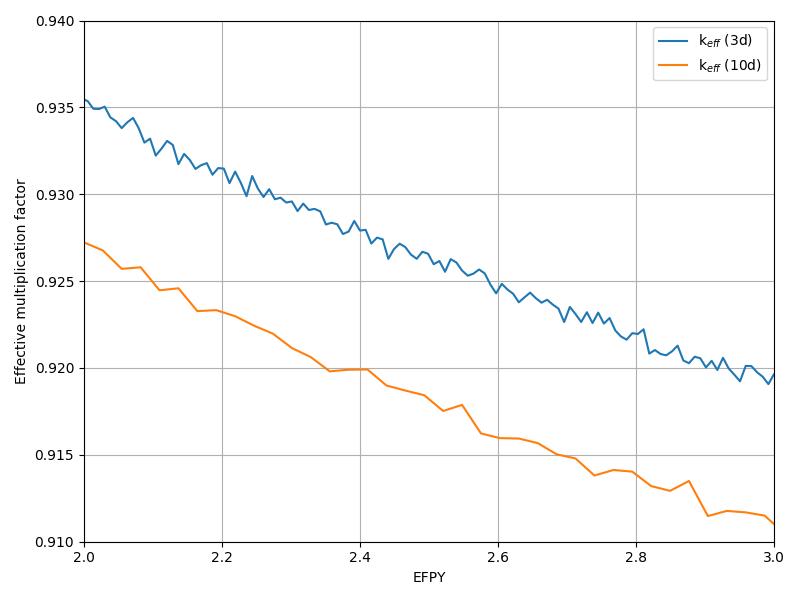

Keff drop over period 0.138567


In [44]:
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax1 = fig_keff_1.subplots()
ax1.grid(True)
ax1.plot(days, k_bds, '-', label='k$_{eff}$ (3d)', linewidth=1.5) # at BDS (feed LEU 19.79%)
ax1.plot(days_10d, k_bds_10d, '-', label='k$_{eff}$ (10d)', linewidth=1.5)
#ax.plot(days_5, k_bds_5, '-', label='k$_{eff}$ at BDS (feed LEU 5%)', linewidth=1.5)
#ax.plot(days2, k_eds, '-', label='k$_{eff}$ at EDS', linewidth=1.5)

#ax.fill_between(days, k_bds-k_bds_err, k_bds+k_bds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(days2, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax1.legend(loc=0)
ax1.set_ylabel('Effective multiplication factor')
ax1.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax1.set_xlim(2,3)
ax1.set_ylim([0.91, 0.94])

#ax2 = ax1.twinx()
#ax2.set_ylabel(r'$\delta k$ from $\delta t = 3 (pcm)')
#ax1.plot(days_10d, (k_bds_10d-k_bds[0::4]), '-', label='k$_{eff}$ (10d)', linewidth=1.5)

fig_keff_1.tight_layout()
fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)
print("Keff drop over period %f" %(k_bds[0]-k_eds[-1]))

<IPython.core.display.Javascript object>


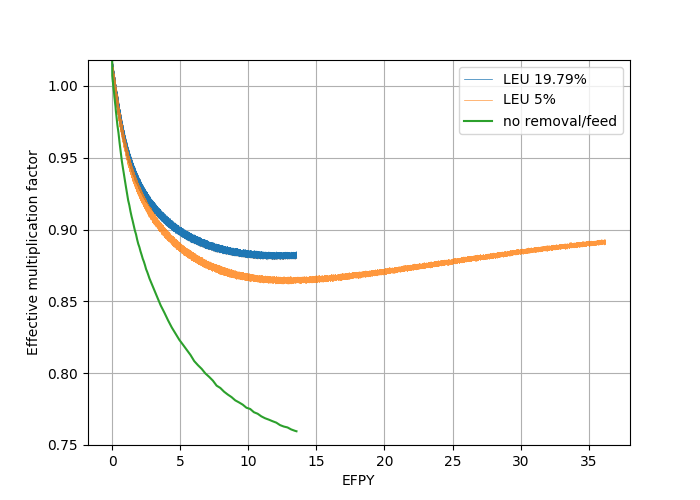

1.01886
1.01864004135 0.890065014362
1.01885998249 0.880293011665


In [6]:
keff = merge(k_bds, k_eds)
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)

keff_5 = merge(k_bds_5, k_eds_5)
efpd_5 = merge(days_5, days2_5)
err_5 = merge(k_bds_err_5, k_eds_err_5)


# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd, keff, '-', label='LEU 19.79%', linewidth=0.5, markerfacecolor="None")
ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)
ax.plot(days_no/365.0, keff_no, '-', label='no removal/feed', linewidth=1.5, markerfacecolor="None")

ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
ax.set_ylim([0.75, 1.018])
#ax.set_xlim(125, 196.0)
# zoomed 2
#ax.set_xlim(367, 471.0)
#ax.set_ylim(0.915, 0.963)
# zoomed 1
#ax.set_xlim(0, 104.0)
#ax.set_ylim(0.98, 1.018)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_3.png',bbox_inches='tight', dpi=700)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_zoomed_1.png',bbox_inches='tight', dpi=700)
print(k_bds[0])
print(keff_5[0], keff_5[-1])
print(keff[0], keff[-1])